In [1]:
import pandas as pd
import numpy as np

### Taking Last 8 Quarters for testing

In [2]:
def split(X,Y):
    X_train = X[:-8]
    X_test = X[-8:]
    y_train = Y[:-8]
    y_test = Y[-8:]
    
    return X_train, X_test, y_train, y_test

In [3]:
from sklearn.model_selection import train_test_split

def random_forest(df):
    df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]
    
    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    X = X.values
    Y = Y.values
    
    
    X_train, X_test, y_train, y_test = split( X, Y)
    X_train_means = np.mean(X_train, axis = 0)
    X_train_std = np.std(X_train, axis = 0)
    X_train_scaled = (X_train - X_train_means)/X_train_std
    
    #print(np.shape(X_train_scaled)[1])

    X_test_scaled = (X_test - X_train_means)/X_train_std
    # Import the model we are using
    from sklearn.ensemble import RandomForestRegressor
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 1000,max_depth = 30 ,max_features = 'sqrt',min_samples_leaf=4, random_state = 42)
    # Train the model on training data
    rf.fit(X_train_scaled, y_train)
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test_scaled)
    
    return predictions,y_test

In [4]:
df = pd.read_csv("./clean_data/AXP_quarterly_financial_data.csv", delimiter = ',')
df.head()

,Quarter end,Assets,Liabilities,Shareholders equity,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Cash from operating activities,...,Price,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Equity to assets ratio,Net margin,Asset turnover
0,1993-12-31,0.030489,0.028701,0.047973,0.040024,0.011331,0.011331,0.000000,0.265306,-0.792649,...,-0.098867,0.08062,0.013605,0.042230,-0.047297,0.090157,inf,0.017241,-0.026289,0.0
1,1994-03-31,0.030489,0.028701,0.047973,0.040024,0.011331,0.011331,0.000000,0.265306,-0.792649,...,-0.098867,0.08062,0.013605,0.042230,-0.047297,0.090157,inf,0.017241,-0.026289,0.0
2,1994-06-30,-0.015495,0.010165,-0.261772,0.040024,0.011331,0.011331,0.000000,0.265306,-0.792649,...,-0.008000,0.08062,0.013605,-0.262561,-0.047297,0.090157,16.250000,-0.250000,-0.026289,0.0
3,1994-09-30,0.028231,0.029208,0.015391,0.027366,0.033613,0.033613,0.028986,0.265306,-9.568562,...,0.099078,0.08062,0.013605,-0.008791,0.489362,0.090157,0.050725,-0.012712,-0.026289,0.0
4,1994-12-31,-0.012109,-0.008332,-0.062382,0.053552,-0.094851,-0.094851,-0.154930,0.265306,-0.612412,...,0.044025,0.08062,0.013605,-0.044346,0.052381,0.090157,0.103448,-0.051502,-0.026289,0.0


In [5]:
df.columns

Index(['Quarter end', 'Assets', 'Liabilities', 'Shareholders equity',
       'Revenue', 'Earnings', 'Earnings available for common stockholders',
       'EPS basic', 'EPS diluted', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period', 'Price', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Equity to assets ratio',
       'Net margin', 'Asset turnover'],
      dtype='object')

### Running Random Forest For all stocks

In [6]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds = {}
all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./new_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = random_forest(df)
        all_preds[str(filenames[i])] = preds
        all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [7]:
all_preds

{'A_quarterly_financial_data.csv': array([ 0.04491765,  0.0455418 ,  0.02796086,  0.0253012 ,  0.03865493,
        -0.05637214,  0.06268736, -0.00156791]),
 'AMR_quarterly_financial_data.csv': array([ 0.00835014,  0.04049526,  0.04309584, -0.02236488,  0.0178626 ,
         0.06881007, -0.02363355, -0.04911154]),
 'AAN_quarterly_financial_data.csv': array([-0.00030345, -0.01618251,  0.06689659,  0.00070211,  0.00839948,
         0.05460691,  0.03451324, -0.00277147]),
 'AAPL_quarterly_financial_data.csv': array([ 0.0429458 ,  0.10045227,  0.08544239,  0.05998077,  0.04860427,
         0.10575649,  0.08429068, -0.00429159]),
 'ABMD_quarterly_financial_data.csv': array([0.04390423, 0.07027119, 0.0980912 , 0.064346  , 0.0734239 ,
        0.06476486, 0.04273952, 0.03795663]),
 'ABT_quarterly_financial_data.csv': array([ 0.0192784 ,  0.01475054, -0.02183689,  0.0251213 ,  0.01460135,
        -0.04398013, -0.02807721, -0.00517942]),
 'ADBE_quarterly_financial_data.csv': array([0.06951229, 0.0

In [8]:
Predictions = pd.DataFrame.from_dict(all_preds, orient='index')
labels_df = pd.DataFrame.from_dict(all_labels, orient='index')
Predictions

,0,1,2,3,4,5,6,7
A_quarterly_financial_data.csv,0.044918,0.045542,0.027961,0.025301,0.038655,-0.056372,0.062687,-0.001568
AMR_quarterly_financial_data.csv,0.008350,0.040495,0.043096,-0.022365,0.017863,0.068810,-0.023634,-0.049112
AAN_quarterly_financial_data.csv,-0.000303,-0.016183,0.066897,0.000702,0.008399,0.054607,0.034513,-0.002771
AAPL_quarterly_financial_data.csv,0.042946,0.100452,0.085442,0.059981,0.048604,0.105756,0.084291,-0.004292
ABMD_quarterly_financial_data.csv,0.043904,0.070271,0.098091,0.064346,0.073424,0.064765,0.042740,0.037957
ABT_quarterly_financial_data.csv,0.019278,0.014751,-0.021837,0.025121,0.014601,-0.043980,-0.028077,-0.005179
ADBE_quarterly_financial_data.csv,0.069512,0.058851,0.047808,0.083061,0.092164,0.075550,0.003508,0.007871
ADI_quarterly_financial_data.csv,0.041908,0.063493,0.036354,0.053007,0.008013,0.014362,0.003429,0.020289
ADM_quarterly_financial_data.csv,0.011261,-0.021717,0.032625,0.043857,0.018551,0.029548,-0.001492,0.004030
ADSK_quarterly_financial_data.csv,0.074124,0.046988,0.045042,0.033516,0.041212,0.005474,0.006528,-0.008317


In [9]:
labels_df

,0,1,2,3,4,5,6,7
A_quarterly_financial_data.csv,0.121961,0.081399,0.109358,-0.015789,-0.054199,0.019101,0.037037,0.128109
AMR_quarterly_financial_data.csv,0.046562,0.019773,0.064431,-0.144782,-0.117595,-0.103093,-0.074292,-0.057238
AAN_quarterly_financial_data.csv,0.230326,-0.070525,0.083438,0.020707,0.113745,-0.038068,0.034681,0.176846
AAPL_quarterly_financial_data.csv,0.035859,0.072553,0.012376,0.063163,0.164196,-0.079936,-0.106246,0.135127
ABMD_quarterly_financial_data.csv,0.172721,0.175554,0.348526,0.472944,0.102515,-0.082226,-0.132577,-0.180744
ABT_quarterly_financial_data.csv,0.116649,0.081271,0.083093,0.003994,0.109730,0.048245,0.040182,0.080959
ADBE_quarterly_financial_data.csv,0.093574,0.149551,0.148083,0.210065,0.102581,-0.041912,-0.027733,0.147757
ADI_quarterly_financial_data.csv,0.039663,0.015986,0.084515,-0.022862,0.087964,-0.082403,0.018028,0.202435
ADM_quarterly_financial_data.csv,-0.025156,-0.017282,0.015177,0.052444,0.083202,-0.050583,-0.062267,-0.033668
ADSK_quarterly_financial_data.csv,0.194837,0.113167,0.019584,0.036452,0.098839,0.048947,-0.042018,0.213859


In [10]:
Predictions.to_csv('./Labels_and_Preds/Predictions_RF.csv')
labels_df.to_csv('./Labels_and_Preds/Labels.csv')

### Getting Results for Quarter

In [11]:
def give_quarter_performance(Predictions,Labels,quarter):
    Q = Predictions[quarter]
    Q_labels = labels_df[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[str(index)]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

In [12]:
Q_1_result = give_quarter_performance(Predictions,labels_df,1)

In [13]:
def quarter_performance(Quarter_result):    
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        

In [14]:
Q_1_per = quarter_performance(Q_1_result)

In [15]:
Q_1_per

7.609781975821643

In [20]:
import matplotlib.pyplot as plt

def total_performance(num_quarters):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter :'+str(quarter+1)+'\t Result :' +str(Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = pow(total_returns/100, 1/num_quarters) - 1
    CAGR = pow(total_returns/100, 1/(num_quarters/4)) - 1
    
    print('Compounded Result :'+str(compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :', q_avg_return*100, '%')
    print('Annual Compounded Growth Rate :', CAGR*100, '%')
    print('Sharpe Ratio :', pow(q_avg_return*100/np.std(q_pers),1/4))
    
    plt.plot(q_turnouts)
    plt.ylabel('Performance')
    plt.xlabel('Quarters')
    plt.show()


Quarter :1	 Result :8.875756690932093 %
Quarter :2	 Result :7.609781975821643 %
Quarter :3	 Result :5.603823678951763 %
Quarter :4	 Result :4.9336245581601075 %
Quarter :5	 Result :5.676702411381764 %
Quarter :6	 Result :-2.769552399488807 %
Quarter :7	 Result :0.9431876713871882 %
Quarter :8	 Result :9.073568670171829 %
Compounded Result :46.877520069497336 %
Quarterly Compounded Growth Rate : 4.922689981291706 %
Annual Compounded Growth Rate : 21.193036132237133 %
Sharpe Ratio : 1.0662124607900367


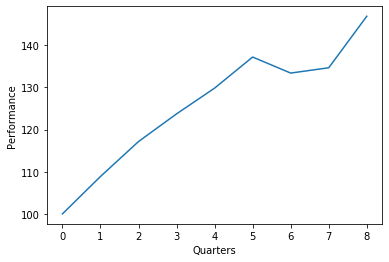

In [21]:
total_performance(8)

In [ ]:
Q_1_result